# Simple Workflow with aiida

## Define workflow with aiida

In [1]:
from python_workflow_definition.aiida import write_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import load_profile
load_profile()

workflow_json_filename =  "aiida_to_jobflow_simple.json"

In [2]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y, 
    add_x_and_y_and_z as _add_x_and_y_and_z,
)

In [3]:
@task.pythonjob()
def pickle_node(value):
    """Handle data nodes"""
    return value

In [4]:
add_x_and_y = task.pythonjob(outputs=["x", "y", "z"])(_add_x_and_y)
add_x_and_y_and_z = task.pythonjob()(_add_x_and_y_and_z)

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
wg = WorkGraph("wg-simple")

In [6]:
helper_task1 = wg.add_task(pickle_node, name="x", value=1)
helper_task2 = wg.add_task(pickle_node, name="y", value=2)

In [7]:
add_x_and_y_task = wg.add_task(
    add_x_and_y,
    name="add_x_and_y",
    x=helper_task1.outputs.result,
    y=helper_task2.outputs.result,
)

In [8]:
add_x_and_y_and_z_task = wg.add_task(
    add_x_and_y_and_z,
    name="add_x_and_y_and_z",
    x=add_x_and_y_task.outputs.x,
    y=add_x_and_y_task.outputs.y,
    z=add_x_and_y_task.outputs.z,
)

In [9]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)

{'nodes': {'0': 1,
  '1': 2,
  '2': 'simple_workflow.add_x_and_y',
  '3': 'simple_workflow.add_x_and_y_and_z'},
 'edges': [{'target': 2,
   'targetHandle': 'x',
   'source': 0,
   'sourceHandle': None},
  {'target': 2, 'targetHandle': 'y', 'source': 1, 'sourceHandle': None},
  {'target': 3, 'targetHandle': 'x', 'source': 2, 'sourceHandle': 'x'},
  {'target': 3, 'targetHandle': 'y', 'source': 2, 'sourceHandle': 'y'},
  {'target': 3, 'targetHandle': 'z', 'source': 2, 'sourceHandle': 'z'}]}

In [10]:
!cat {workflow_json_filename}

{
  "nodes": {
    "0": 1,
    "1": 2,
    "2": "simple_workflow.add_x_and_y",
    "3": "simple_workflow.add_x_and_y_and_z"
  },
  "edges": [
    {
      "target": 2,
      "targetHandle": "x",
      "source": 0,
      "sourceHandle": null
    },
    {
      "target": 2,
      "targetHandle": "y",
      "source": 1,
      "sourceHandle": null
    },
    {
      "target": 3,
      "targetHandle": "x",
      "source": 2,
      "sourceHandle": "x"
    },
    {
      "target": 3,
      "targetHandle": "y",
      "source": 2,
      "sourceHandle": "y"
    },
    {
      "target": 3,
      "targetHandle": "z",
      "source": 2,
      "sourceHandle": "z"
    }
  ]
}

## Load Workflow with jobflow

In [11]:
from python_workflow_definition.jobflow import load_workflow_json

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
from jobflow.managers.local import run_locally

In [13]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [14]:
result = run_locally(flow)
result

2025-03-22 09:38:21,738 INFO Started executing jobs locally
2025-03-22 09:38:22,164 INFO Starting job - add_x_and_y (2a742a0c-14eb-4969-aac0-8d63a4ffe064)
2025-03-22 09:38:22,166 INFO Finished job - add_x_and_y (2a742a0c-14eb-4969-aac0-8d63a4ffe064)
2025-03-22 09:38:22,167 INFO Starting job - add_x_and_y_and_z (bd204fad-4ce1-4e7e-954e-11f6bfd19ff4)
2025-03-22 09:38:22,171 INFO Finished job - add_x_and_y_and_z (bd204fad-4ce1-4e7e-954e-11f6bfd19ff4)
2025-03-22 09:38:22,172 INFO Finished executing jobs locally


{'2a742a0c-14eb-4969-aac0-8d63a4ffe064': {1: Response(output={'x': 1, 'y': 2, 'z': 3}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 'bd204fad-4ce1-4e7e-954e-11f6bfd19ff4': {1: Response(output=6, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))}}

## Load Workflow with pyiron_base

In [15]:
from pyiron_base import Project

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [17]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

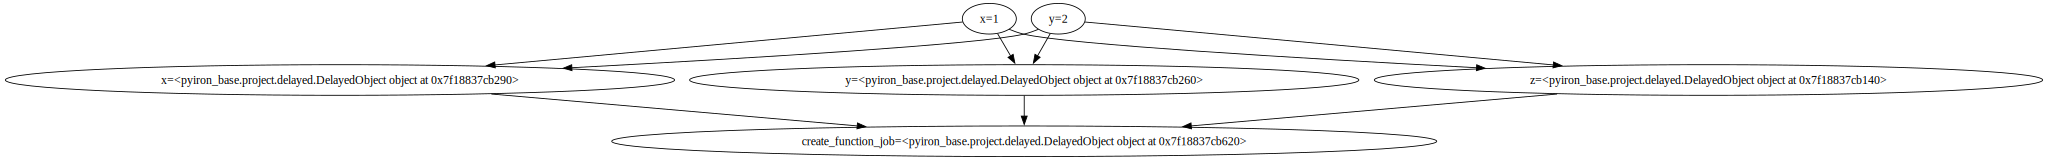

In [18]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [19]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 1
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 2


6